<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = Alessandro Baldassarre
* **UCID** = 30163507
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [56]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

# Load the concrete dataset
X, y = load_concrete()

## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [57]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate the models with max_depth=5
dt_model = DecisionTreeRegressor(max_depth=5)
rf_model = RandomForestRegressor(max_depth=5, n_estimators=100)  # n_estimators set to default value of 100
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=100)  # n_estimators set to default value of 100

# Calculate the average training and validation accuracy using mean squared error with cross-validation
models = {'DT': dt_model, 'RF': rf_model, 'GB': gb_model}
results = {}

for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    training_score = -1 * cv_results['train_score'].mean()
    validation_score = -1 * cv_results['test_score'].mean()
    results[name] = {'Training Accuracy': training_score, 'Validation Accuracy': validation_score}

# Organizing the results in a pandas dataframe
results_df = pd.DataFrame(results).T
results_df.columns = ['Training Accuracy', 'Validation Accuracy']
results_df


,Training Accuracy,Validation Accuracy
DT,47.918561,163.736747
RF,31.610781,157.288837
GB,3.739270,98.345438


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [58]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.
# Calculate the average training and validation accuracy using R2 score with cross-validation
results_r2 = {}

for name, model in models.items():
    cv_results_r2 = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
    training_score_r2 = cv_results_r2['train_score'].mean()
    validation_score_r2 = cv_results_r2['test_score'].mean()
    results_r2[name] = {'Training R2 Score': training_score_r2, 'Validation R2 Score': validation_score_r2}

# Organizing the results in a pandas dataframe
results_r2_df = pd.DataFrame(results_r2).T
results_r2_df.columns = ['Training R2 Score', 'Validation R2 Score']
results_r2_df


,Training R2 Score,Validation R2 Score
DT,0.822887,0.176211
RF,0.882276,0.154131
GB,0.986436,0.492611


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>YOUR ANSWERS HERE</b></font>

- In comparison to the regression in the last assignment, these results contained a lower MSE and a much higher R2 score for training but a lower R2 score for validation. The linear regression model in assignment 1 had an MSE of 110 and 95 approximately for training accuracy and validation accuracy respectively. The R2 score was 0.61 and 0.64 once again for training accuracy and validation accuracy respectively. The MSE in this assignment was much lower for training the highest being the DT model at 47.9 for training and 163.3 for validation. The validation MSE of the Gradient Boosting model was about the same as the linear model used in the first assignment but the training MSE for GB was much lower thus it performed better.  
- Given the results, I would select Gradient Boosting for this dataset because it contains the lowest MSE meaning it minimizes the error on predictions and also contains the highest R2 score meaning it gives the best fit to the variance in the dataset.
- To increase the accuracy of the tree-based models I would:
  1. I would tune the hyperparameters such as max_depth or n_estimators since these hyperparameters can significantly impact the performance of the model.
  2. Data preprocessing as we did before to handle outliers and missing values. Potentially also scaling.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify
the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

- I used the lecture slides for review on Gradient Boosting and used the previous labs as well as the scikit learn gradient boosting regressor documentation.
- I completed the steps in the order provided
- I used generative AI whenever I ran into problems, since colab has a Colab AI that can be used right away when encountering errors it was very helpful and I only had to change the code a little and sometimes it wouldn't be of much help. I also used ChatGPT to further explain patterns that would occur in the results and what might be causing them. My prompts were simple such as "Why is mean squared error this high" or "what does it mean for mean squared error to be negative? Is that possible?"
- My main challenges was figuring out how to do everything, as general as that sounds. What helped me be most successful was being resourceful (reading documentation, reviewing lecture slides and labs, potentially watching youtube tutorials). I also struggle to understand the machine learning concepts

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [59]:
# TO DO: Import wine dataset
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X_wine = wine.data.features
y_wine = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [60]:
# TO DO: ADD YOUR CODE HERE

# Printing first 5 rows of the dataset
print(X_wine.head())
print(y_wine.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [61]:
# TO DO: ADD YOUR CODE HERE
# Check for missing values in the features DataFrame
missing_values_X = X_wine.isnull().sum()
print(missing_values_X)

# Check for missing values in the targets Series/DataFrame
missing_values_y = y_wine.isnull().sum()
print(missing_values_y)

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64
class    0
dtype: int64


How many samples do we have of each type of wine?

In [62]:
# TO DO: ADD YOUR CODE HERE
wine_types_count = y_wine.value_counts()
wine_types_count

class
2        71
1        59
3        48
dtype: int64

## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [63]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Instantiate the models
svc = SVC()
dt = DecisionTreeClassifier(max_depth=3)

# Perform cross-validation for both models
cv_results_svc = cross_validate(svc, X_wine, y_wine.iloc[:, 0], cv=5, scoring='accuracy', return_train_score=True)
cv_results_dt = cross_validate(dt, X_wine, y_wine.iloc[:, 0], cv=5, scoring='accuracy', return_train_score=True)

# Calculate the average training and validation accuracy for each model
avg_train_accuracy_svc = cv_results_svc['train_score'].mean()
avg_test_accuracy_svc = cv_results_svc['test_score'].mean()

avg_train_accuracy_dt = cv_results_dt['train_score'].mean()
avg_test_accuracy_dt = cv_results_dt['test_score'].mean()

avg_train_accuracy_svc, avg_test_accuracy_svc, avg_train_accuracy_dt, avg_test_accuracy_dt

# Creating results df to print the results
results_df = pd.DataFrame({
    'Model': ['SVC', 'Decision Tree'],
    'Training Accuracy': [avg_train_accuracy_svc, avg_train_accuracy_dt],
    'Validation Accuracy': [avg_test_accuracy_svc, avg_test_accuracy_dt]
})

results_df

,Model,Training Accuracy,Validation Accuracy
0,SVC,0.703743,0.663492
1,Decision Tree,0.976165,0.898730


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [64]:
# TO DO: Implement best model

# Fit the model to the entire dataset
dt.fit(X_wine, y_wine)

# Make predictions
y_pred = dt.predict(X_wine)

<Axes: >

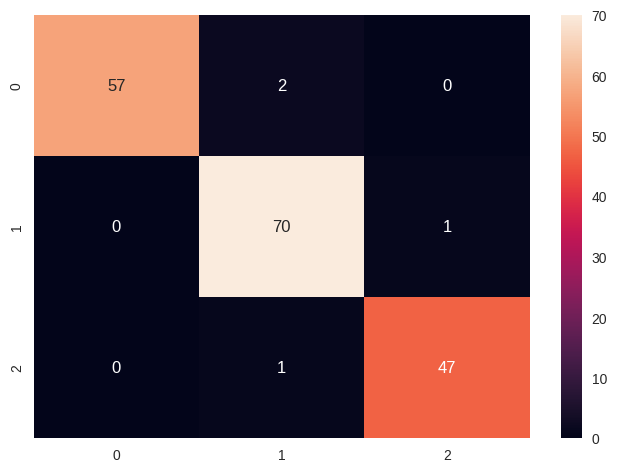

In [65]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

# Create confusion matrix
conf_matrix = confusion_matrix(y_wine, y_pred)
heatmap(conf_matrix, annot=True)


In [66]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_wine, y_pred)

print(class_report)

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
2. What are two reasons why the support vector machines model did not work as well as the tree-based model?
3. How many samples were incorrectly classified in step 5.2?
4. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>YOUR ANSWERS HERE</b></font>

- The SVC model achieved lower training and validation accuracies in comparison to the Decision Tree model. The SVC had training accuracy of 70.4% and validation accuracy of 66.3% while the Decision Tree model had training accuracy of 97.5% and validation accuracy of 87.1%. This means overall the Decision Tree model performed much better in both training and validation accuracy meaning it is better at both learning from the training data and making predictions.

- If the separation of the classes using the hyperplane does not align well with the structure of the wine data, then this could lean to lower performance. Since Decisions Trees don't rely don't rely on these kind of transformations, they iteratively split the data based on the feature values that most effectively separate the classes.

- SVC models can rely heavily on the choice of kernel and hyperparameters like the regularization parameter C and gamma. If these hyperparameters are not tuned properly for the dataset then the model might not capture the underlying patterns well. Decision Trees could potentially capture these patterns better without needing so much hyperparameter tuning.

- 4 samples were incorrectly classified in step 5.2 as can be seen in the confusion matrix using a heatmap.

- Maximizing precision would be more important if wine being incorrectly labeled as belonging to a greater quality category when it is not can lead to reputation damage or financial loss.

- Maximizing recall would be more important if the goal is to guarantee that as many wines of a certain group are identified correctly even accepting more false positives. This would be more important if missing a high quality wine (false negative) is more costly than incorrectly classifying a lower quality wine as high quality.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

- My code was sourced from the previous labs, lecture slides, and scikit learn documentation as well as colab AI whenever I ran into errors.
- I completed the steps in the order that was provided.
- I mainly used colab AI when running into errors and I used chatGPT sometimes to explain concepts or patterns from the results. This helped deepen my understanding. I used prompts such as "Explain SVC and Decision Trees in Machine Learning, list advantages and disadvantages to both." and "Why might a decision tree be performing better than a SVC model?"
- Yes, one of my challenges was just figuring out how to do certain things like using a confusion matrix from scikit learn and the classification report. Although minor challenges, what helped me most was once again being resourceful and looking through documentation as well as reviewing slides and doing more research on my own time.

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
ADD YOUR FINDINGS HERE
</b></font>

The Decision Tree model provided high training and validation accuracies, suggesting it was very effective without overfitting, as proven by the high validation accuracy.

The SVC model had lower training and validation accuracies in comparison to the decision tree model. This suggests the SVC model struggled to perform perhaps due to complexity of the dataset or the dataset characteristics didn't match well with the default kernel. In lecture we learned that choosing the kernel is actually very important as it can provide better results.

Overall, the results showcase the importance of choosing the correct model and the importance of tuning the parameters to achieve an effective, performant model.

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

<font color='Green'><b>
ADD YOUR THOUGHTS HERE
</b></font>

- I liked how this assignment was slightly more challenging than the first assignment but still very doable at our level and very applied as the course is "**Applied** Machine Learning".
- I found researching this wine dataset to be interesting as well as thinking about the last question regarding which is more important in this case, maximizing precision or maximizing recall. This made me really think about which would be more important.


## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [67]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC

# Instantiate the models
linear_SVC = LinearSVC(max_iter=5000)

# Perform cross-validation for both models
linear_SVC_scores = cross_validate(linear_SVC, X_wine, y_wine.iloc[:, 0], cv=5, scoring='accuracy', return_train_score=True)

# Calculate the average training and validation accuracy for each model
linear_SVC_train_accuracy = linear_SVC_scores['train_score'].mean()
linear_SVC_validation_accuracy = linear_SVC_scores['test_score'].mean()

linear_SVC_train_accuracy, linear_SVC_validation_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.9130503299517384, 0.8763492063492062)

*ANSWER HERE*

Linear SVC improves the results drastically. This could be because the wine dataset is closer to being linearly separable thus it performs better than SVC with a non-linear kernel.

In regards to being a good fit, I believe this model is not a great fit due to the convergence issues even with a high max_iter= value. To overcome this would mean either increasing that already high value or needing to tune hyperparameters. There is potential as seen in the high increase of accuracies however the linear SVC model would require further tuning for it to be a good fit.